# Question 1-Delivery Time

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [6]:
dt_st=pd.read_csv('C:/Users/fast/Desktop/Assignment/Simple Linear Regression/delivery_time.csv')
dt_st.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
dt_st=dt_st.rename(columns={'Delivery Time' : 'dt','Sorting Time' :'st'})

In [8]:
print(dt_st)

       dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5


In [9]:
dt_st.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


<ipython-input-11-a5a80b41eead>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(x=dt_st.st, y=dt_st.dt, Color='green')


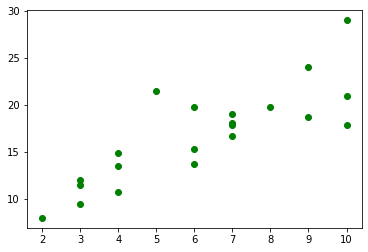

In [11]:
plt.scatter(x=dt_st.st, y=dt_st.dt, Color='green')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba5e39b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba5e3bd0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba5e39b670>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5e3bd790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5e3bdaf0>],
 'means': []}

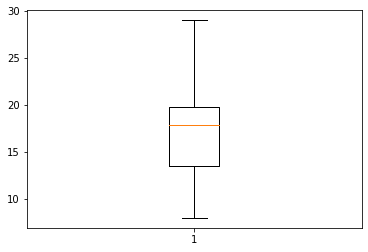

In [12]:
plt.boxplot(dt_st.dt)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

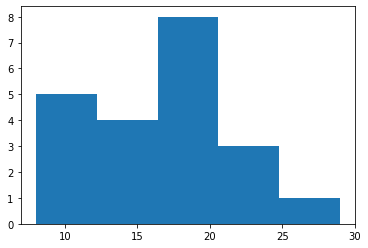

In [13]:
plt.hist(dt_st.dt, bins=5)

In [19]:
import statsmodels.formula.api as smf
model1 = smf.ols("dt~st",data = dt_st).fit()

In [20]:
model1.params

Intercept    6.582734
st           1.649020
dtype: float64

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        15:02:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model2=smf.ols("dt~np.log(st)",data=dt_st).fit()

In [24]:
model2.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           2.64e-06
Time:                        15:07:19   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
pred1= model1.predict(dt_st)

In [28]:
pred2= model2.predict(dt_st)

Text(0, 0.5, 'Delivery time')

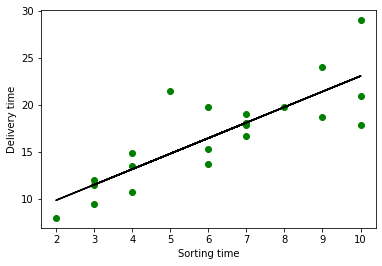

In [33]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.plot(dt_st.st, pred1,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

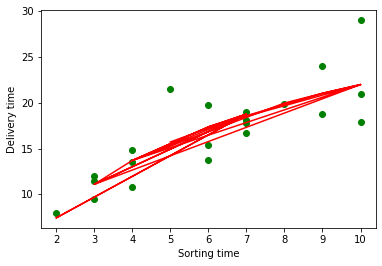

In [34]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.plot(dt_st.st, pred2,color='red')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

# Question 2 Salary Hike

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
data=pd.read_csv('C:/Users/fast/Desktop/Assignment/Simple Linear Regression/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [46]:
data.shape

(30, 2)

In [47]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


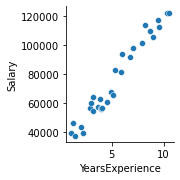

In [48]:
sns.pairplot(y_vars = 'Salary',x_vars = 'YearsExperience' ,data=data)

In [49]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [51]:
x=data['YearsExperience']
y=data['Salary']

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.7,test_size = 0.3,random_state = 100)

In [55]:
x_train.shape

(21,)

In [57]:
x_test.shape

(9,)

In [60]:
x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_sm).fit()

In [62]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           9.91e-14
Time:                        18:16:10   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387     

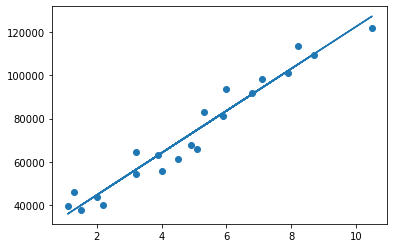

In [65]:
plt.scatter(x_train,y_train)
plt.plot(x_train,25200+x_train * 9731.2038)
plt.show()

In [67]:
y_train_pred = model.predict(x_train_sm)

In [69]:
y_train_pred.head()

17     76778.268129
22    102079.398108
11     64127.703139
4      46611.536230
29    127380.528088
dtype: float64

In [70]:
residual = (y_train - y_train_pred)

In [71]:
residual.head()

17    6309.731871
22    -777.398108
11   -8333.703139
4    -6720.536230
29   -5508.528088
dtype: float64

C:\Users\fast\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

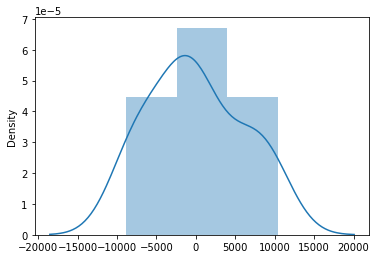

In [73]:
sns.distplot(residual)

C:\Users\fast\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

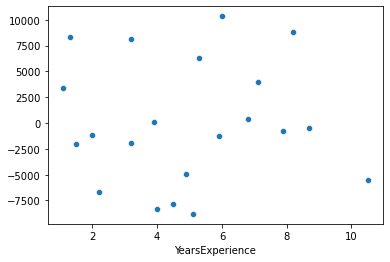

In [74]:
sns.scatterplot(x_train,residual)

In [75]:
x_test_sm= sm.add_constant(x_test)

In [76]:
y_pred = model.predict(x_test_sm)

In [78]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

5505.479002176126

In [79]:
r2_score(y_test,y_pred)

0.962766868547327

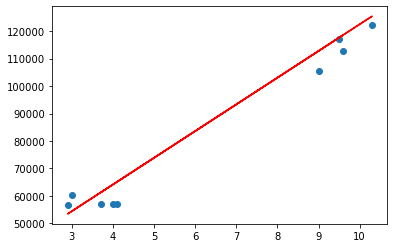

In [82]:
plt.scatter(x_test,y_test)
plt.plot(x_test,25200+x_test * 9731.2038,'r')
plt.show()